# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
train_df=pd.DataFrame(train['labels'])
n_train = train_df.shape[0]

# TODO: Number of testing examples.
test_df=pd.DataFrame(test['labels'])
n_test = test_df.shape[0]

# TODO: What's the shape of an traffic sign image?
images=train['features'][0]
image_shape = np.shape(images)

# TODO: How many unique classes/labels there are in the dataset.
classes=set(train['labels'])
n_classes = len(classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

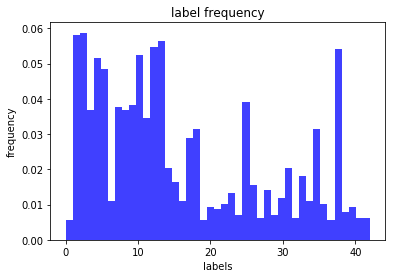

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(y_train, n_classes, normed=1, histtype='bar', facecolor='b', alpha=0.75)
ax.set_title('label frequency')
ax.set_xlabel('labels')
ax.set_ylabel('frequency')

plt.show()


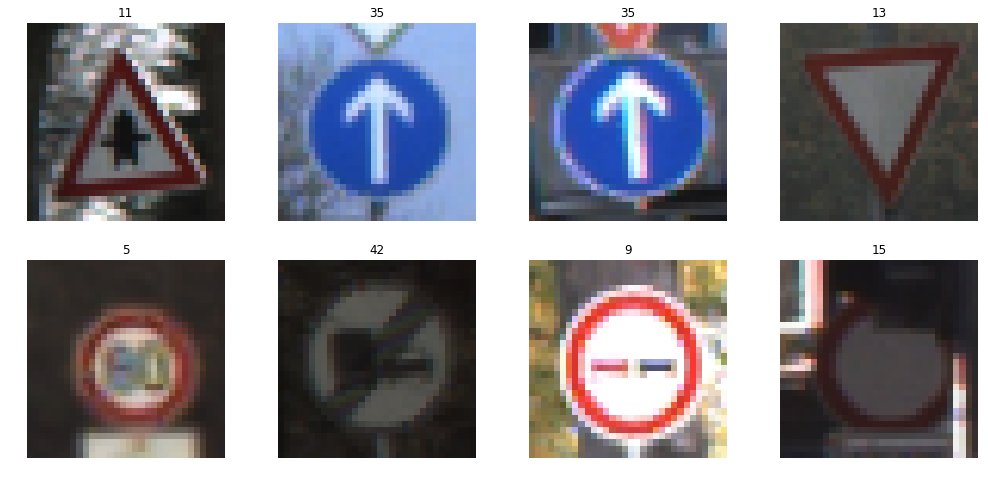

In [4]:

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(2,4, figsize=(18, 8))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
#show 8 images with axis off 
for i in range(8):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image,cmap="gray")
    axs[i].set_title(y_train[index])


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

> In data preprocessing stage, There are following two steps that conducting to pre-process image data:

> ** (1) Convert Color images to Gray-scale ** 

>Here, we use opencv-python API function, the convert formula is listed as following:
gray= R \*  0.299+ G  \*  0.587+ B * 0.114

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import cv2

# convert color image to gray-scale image，here we use opencv api function, 
# gray= R*0.299+G*0.587+B*0.114
def color2gray(image):
    gray_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return gray_img

def Images_color2Gray(image_group):
    X_train_gray=[]
    for train_image in image_group: 
        gray_img=color2gray(train_image)
        gray_img = gray_img[:, :, np.newaxis]
        X_train_gray.append(gray_img)
    
    return X_train_gray


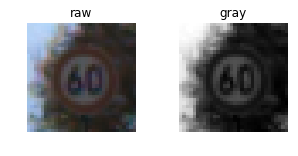

In [6]:

fig, axs = plt.subplots(1,2, figsize=(5, 2))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('raw')
axs[0].imshow(X_train[4900].squeeze())

# transfer gray images to X_train and X_test
X_train = Images_color2Gray(X_train)
X_test = Images_color2Gray(X_test)

axs[1].axis('off')
axs[1].set_title('gray')
axs[1].imshow(X_train[4900].squeeze(), cmap='gray')

> ** (2) Data Normalization **  
As this [wiki](http://ufldl.stanford.edu/wiki/index.php/Data_Preprocessing#Color_Images) metioned, before we put the images into the input of the CNN, we need to nomalize the data, there are three main method for data normalization:
- Simple Rescaling:In simple rescaling, our goal is to rescale the data along each data dimension (possibly independently) so that the final data vectors lie in the range [0,1] or [ − 1,1] (depending on your dataset). In MNIST project, we can normalize the pixels from [0, 255] to [0, 1]. 
- Per-example mean subtraction: If your data is stationary (i.e., the statistics for each data dimension follow the same distribution), then you might want to consider subtracting the mean-value for each example (computed per-example).
- Feature Standardization: Feature standardization refers to (independently) setting each dimension of the data to have zero-mean and unit-variance. This is the most common method for normalization and is generally used widely (e.g., when working with SVMs, feature standardization is often recommended as a preprocessing step). In practice, one achieves this by first computing the mean of each dimension (across the dataset) and subtracts this from each dimension. Next, each dimension is divided by its standard deviation.

> Here I use simple Rescaling  method and convert data range from 0-255 to [-0.5,0.5]

In [7]:
# TODO: Normalize the data features to the variable X_normalized
def normalize_grayscale(image_data):
    a = -0.5
    b = 0.5
    grayscale_min = np.min(image_data)
    grayscale_max = np.max(image_data)
    return a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train_norm = normalize_grayscale(X_train)
X_test_norm  = normalize_grayscale(X_test)


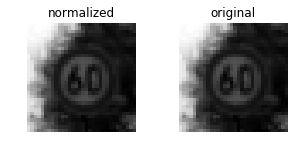

In [8]:
fig, axs = plt.subplots(1,2, figsize=(5, 2))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('normalized')
axs[0].imshow(X_train_norm[4900].squeeze(), cmap='gray')

axs[1].axis('off')
axs[1].set_title('original')
axs[1].imshow(X_train[4900].squeeze(), cmap='gray')

### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [10]:
# print unshuffled data 
print(y_train[0:500])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

** Notes: data needs shuffle to reduce the effectthe data distribution**

In [11]:
from sklearn.utils import shuffle
X_train_norm, y_train = shuffle(X_train_norm, y_train)
print(y_train)

[26 31 17 ..., 18 38 38]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train_norm, y_train, 
                                                                test_size=0.20, random_state=42)

print("X_train has {} data ".format(len(X_train)))
print("X_validation has {} data ".format(len(X_validation)))
print("X_test has {} data ".format(len(X_test)))

X_train has 31367 data 
X_validation has 7842 data 
X_test has 12630 data 


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [13]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [16]:
### Train your model here.
### Feel free to use as many code cells as needed.
#x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32) # probability to keep units


In [17]:
#Create a training pipeline that uses the model to classify data.
rate = 0.001
EPOCHS=80
BATCH_SIZE=128
save_file = './model.ckpt'

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
test_prediction = tf.argmax(logits, 1)
test_softmax = tf.nn.softmax(logits)

In [18]:

#Evaluate how well the loss and accuracy of the model for a given dataset.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [19]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [20]:
#Run the training data through the training pipeline to train the model.
#Before each epoch, shuffle the training set.
#After each epoch, measure the loss and accuracy of the validation set.
#Save the model after training.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.537

EPOCH 2 ...
Validation Accuracy = 0.739

EPOCH 3 ...
Validation Accuracy = 0.818

EPOCH 4 ...
Validation Accuracy = 0.832

EPOCH 5 ...
Validation Accuracy = 0.868

EPOCH 6 ...
Validation Accuracy = 0.895

EPOCH 7 ...
Validation Accuracy = 0.897

EPOCH 8 ...
Validation Accuracy = 0.915

EPOCH 9 ...
Validation Accuracy = 0.910

EPOCH 10 ...
Validation Accuracy = 0.933

EPOCH 11 ...
Validation Accuracy = 0.931

EPOCH 12 ...
Validation Accuracy = 0.934

EPOCH 13 ...
Validation Accuracy = 0.941

EPOCH 14 ...
Validation Accuracy = 0.941

EPOCH 15 ...
Validation Accuracy = 0.950

EPOCH 16 ...
Validation Accuracy = 0.952

EPOCH 17 ...
Validation Accuracy = 0.953

EPOCH 18 ...
Validation Accuracy = 0.957

EPOCH 19 ...
Validation Accuracy = 0.959

EPOCH 20 ...
Validation Accuracy = 0.958

EPOCH 21 ...
Validation Accuracy = 0.962

EPOCH 22 ...
Validation Accuracy = 0.963

EPOCH 23 ...
Validation Accuracy = 0.966

EPOCH 24 ...
Validation Accura

In [21]:
with tf.Session() as sess:
    #saver = tf.train.import_meta_graph('model.ckpt.meta')
    saver.restore(sess, save_file)

    test_accuracy = evaluate(X_test_norm, y_test)
    train_accuracy= evaluate(X_train, y_train)

    prediction=test_accuracy * len(X_test_norm)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Train Accuracy = 0.996
Test Accuracy = 0.917
Validation Accuracy = 0.980


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

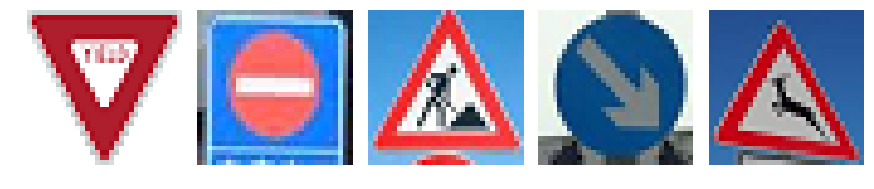

In [22]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Reinitialize and re-import if starting a new kernel here
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2

#reading in an image
import glob
import matplotlib.image as mpimg

fig, axs = plt.subplots(1,5, figsize=(15, 15))
fig.subplots_adjust(hspace = 1, wspace=0.1)
axs = axs.ravel()

m_test_images = []

for i, img in enumerate(glob.glob('./web_image/*.png')):
    image = cv2.imread(img)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(image)
    m_test_images.append(image)
        

### Predict the Sign Type for Each Image

In [23]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# transform to gray images
m_gray = Images_color2Gray(m_test_images)
# normalize images
m_norm = normalize_grayscale(m_gray) 

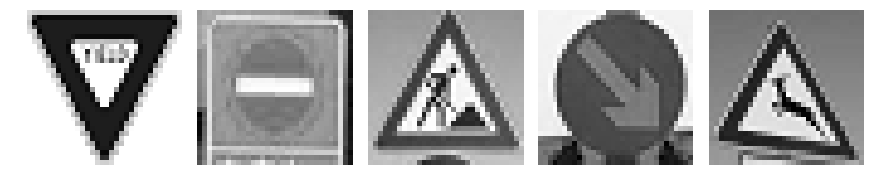

In [24]:
fig, axs = plt.subplots(1,5, figsize=(15, 15))
fig.subplots_adjust(hspace = 1, wspace=0.1)
axs = axs.ravel()

for i in range(len(m_gray)):
    axs[i].axis('off')
    image=m_gray[i].squeeze()
    axs[i].imshow(image,cmap='gray')

In [25]:
saver = tf.train.Saver()
predictor = tf.argmax(tf.nn.softmax(logits), 1)

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)
    out_labels=sess.run(predictor, feed_dict={x: m_norm,keep_prob:0.5})

print(out_labels)
   

[13 17 25 38 31]


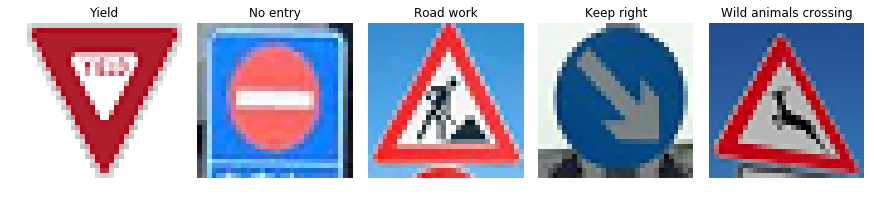

In [26]:
import csv
fd = open('signnames.csv')
signames = dict(csv.reader(fd))

fig, axs = plt.subplots(1,5, figsize=(15, 15))
fig.subplots_adjust(hspace = 1, wspace=0.1)
axs = axs.ravel()


for index in range(len(m_test_images)):
    image = m_test_images[index]
    signame = signames[str(out_labels[index])]
    
    axs[index].axis('off')
    axs[index].set_title(signame)
    axs[index].imshow(image)
    

### Analyze Performance

In [28]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
m_test_label=[13,17,25,38,31]

count=0
for index in range(5):
    if(out_labels[index]==m_test_label[index]):
        count=count+1

test_accuracy=count/5.0

print("Test Accuracy = {:.3f}".format(test_accuracy))
        

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [29]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
saver = tf.train.Saver()
output_topk = tf.nn.top_k(tf.nn.softmax(logits), k=5)

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)
    topk_result=sess.run(output_topk, feed_dict={x: m_norm,keep_prob:0.5})
    
print(topk_result)

TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   6.34437101e-16,   4.04985601e-23,
          5.15150586e-24,   4.19998125e-25],
       [  1.00000000e+00,   4.34199518e-23,   1.69864686e-28,
          4.13321446e-31,   2.39948725e-31],
       [  8.79261076e-01,   1.19257376e-01,   1.39593752e-03,
          8.48669515e-05,   4.63925517e-07],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]], dtype=float32), indices=array([[13,  0,  1,  2,  3],
       [17, 14, 33,  0, 20],
       [25, 20,  4, 26,  5],
       [38, 31, 23, 18, 29],
       [31,  0,  1,  2,  3]], dtype=int32))


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 